  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  
       Subject ID         MRI ID        Group       Visit     MR Delay  M/F  \
count         373            373          373  373.000000   373.000000  373   
unique        150            373            3         NaN          NaN    2   
top     OAS2_0070  OAS2_0001_MR1  No

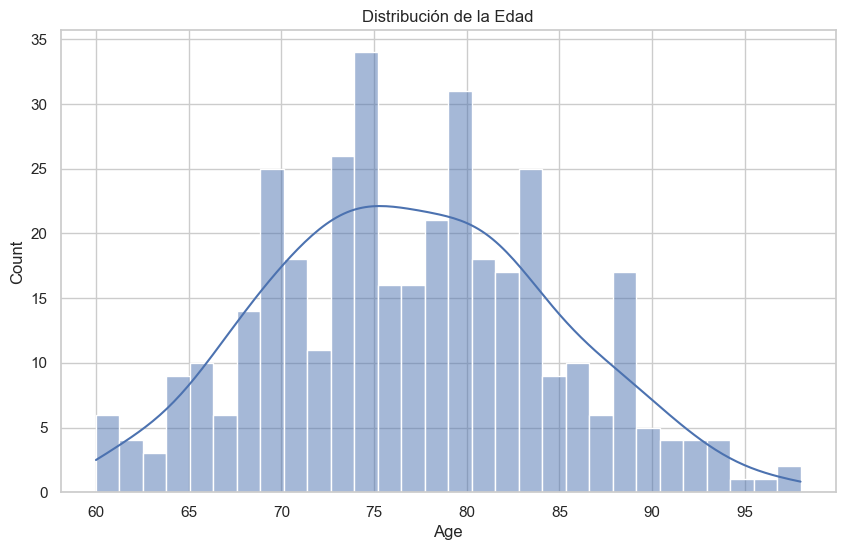

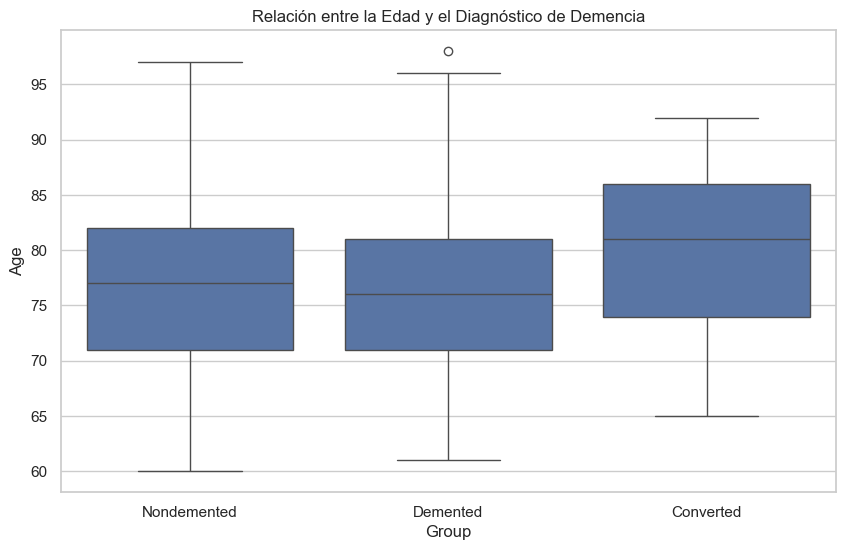

In [1]:
# Importación de las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
%matplotlib inline
sns.set(style="whitegrid")

# Carga del dataset
df = pd.read_csv('./datos/oasis_longitudinal.csv')  

# Visualización de las primeras filas del dataset
print(df.head())

# Estadísticas descriptivas del dataset
print(df.describe(include='all'))

# Verificación de valores faltantes
print(df.isnull().sum())

# Visualizaciones para el EDA
# Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad')

# Relación entre la edad y el diagnóstico de demencia
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Age', data=df)
plt.title('Relación entre la Edad y el Diagnóstico de Demencia')

# Preparación del Dataset
# Limpieza de valores faltantes
df.dropna(inplace=True)  # Ejemplo de eliminación 

# Transformación de variables categóricas a numéricas
df['Group'] = df['Group'].map({'Nondemented': 0, 'Demented': 1, 'Converted': 2})

# Normalización o estandarización de características numéricas 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#  estandarizar la columna 'Age'
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

# Verificación final del dataset preparado
print(df.head())


ValueError: could not convert string to float: 'OAS2_0001'

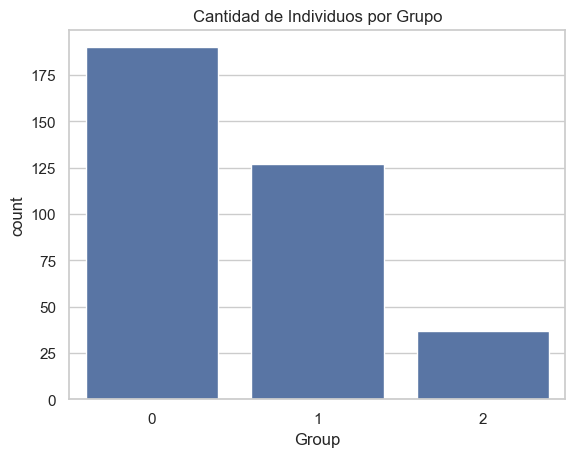

In [2]:
# Continuar con el Análisis Exploratorio de Datos (EDA)

## Visualizaciones adicionales
# Dibujar gráficos de barras para visualizar la cantidad de individuos por grupo
sns.countplot(data=df, x='Group')
plt.title('Cantidad de Individuos por Grupo')

# Correlaciones entre las variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')

## Estadísticas descriptivas adicionales
# Examinar la relación entre las puntuaciones de MMSE y el diagnóstico de demencia
sns.boxplot(data=df, x='Group', y='MMSE')
plt.title('MMSE y Diagnóstico de Demencia')

# Preparación del Dataset

## Limpieza y transformación de datos
# Convertir las variables categóricas a variables dummy si es necesario
df_dummies = pd.get_dummies(df, columns=['Group', 'M/F'])

# Revisar si hay más valores faltantes y decidir cómo tratarlos
# Opción 1: Imputar los valores faltantes
# Opción 2: Eliminar filas o columnas con valores faltantes

## Estandarización o Normalización de variables numéricas
# Elegir las columnas que necesitan ser normalizadas y aplicar la transformación
columns_to_scale = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

## Separación de los datos en características y etiquetas
X = df_scaled.drop('Group_Demented', axis=1) # Eliminar la columna objetivo
y = df_scaled['Group_Demented'] # Etiqueta objetivo

## Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora el dataset está listo para ser utilizado en la fase de modelado.
